In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12, 9)

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)


# Enrichment

Enrichment is the stage at which natural uranium is processed to acheive higher concentrations of fissile $^{235}U$ isotopes.

## Learning Objectives

- Recall the isotopic content of natural uranium.
- Identify target enrichments for various applications.
- Distinguish among enrichment technologies.
- Discuss the history of enrichment technology development.
- Calculate separation potentials.
- Quantify the relationship between feed, product, and tails during enrichment.
- Calculate SWU, Feed, and Waste Factors.
- Explain the physical and chemical mechanisms of various enrichment technologies.
- Discuss the nonproliferation implications of enrichment technology export control.

## Natural Uranium

Natural uranium, $U_{nat}$ is uranium found in nature. By weight it contains :

- 0.711\% $^{235}U$
- 99.284\% $^{238}U$
- trace amount (0.0055\%) of $^{234}U$

The halflife of 238U is different (longer) than 235U, so the ratio changes over time. (Where time is measured in millions of years.)

## Enrichment Level

_Commercial LWR Fuel_: Commercial nuclear fuel for light water reactors is typically in the range of 3-5%

_Research Reactor Fuel_: Research reactor fuel (such as TRIGA reactors in many universities) was previously often as high as 40%. However, a downblending effort was undertaken nationally and the fuel is now much less enriched.

_Small Modular Reactor Fuel_: Small modular reactors often boast long running times, such that the fuel rarely needs to be replaced. Though these typically rely on breeding for long term sustainability, the initial enrichment is usually relatively high in these designs.

_Navy Fuel_: Classified, but high. 

_Weapons_: Very high. This varies by weapon type. Does anyone recall the $^{325}U$ enrichment of the Godiva device? (_Hint_: It was 30cm in diameter.)


In [2]:
enr_sources = {'natural U':0.007,
               'recycled U': 0.01}

enr_uses = {'CANDU':0.007,
            'LWR': 0.045,
            'Research':0.20,
            'Weapons': 0.9}

import collections
od_enr_uses = collections.OrderedDict(sorted(enr_uses.items()))

/Users/khuff/anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


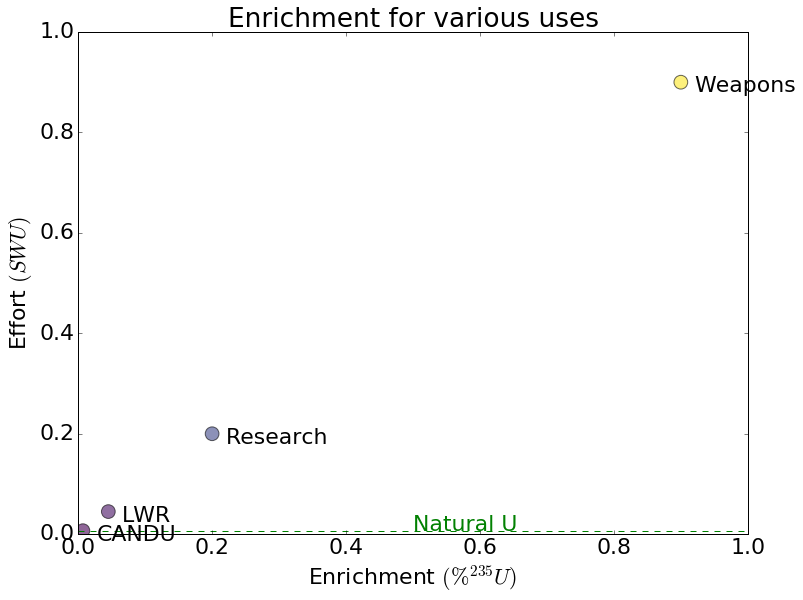

In [3]:
import numpy as np

x=[]
y=[]
delta_x=0.02
delta_y=-0.02

for k,v in od_enr_uses.items():
    x.append(v)
    y.append(v)
    plt.text(v + delta_x, v + delta_y, k)
t = x
area = 60*np.pi
plt.scatter(x, y, s=area, c=t, cmap='viridis', alpha=0.6)
plt.axis([0,1,0,1])
plt.xlabel('Enrichment $(\% ^{235}U)$')
plt.ylabel('Effort $(SWU)$')
plt.title('Enrichment for various uses')
plt.plot(0.007*np.ones(2), 'g--')    
plt.text(0.5, 0.007, 'Natural U', color='g')

plt.show()

## Gaseous Diffusion

![http://www.pnausa.org/uploads/1/4/6/7/14674962/6292564.jpg?314](http://www.pnausa.org/uploads/1/4/6/7/14674962/6292564.jpg?314)


$$kT = \frac{1}{2}mv^2$$

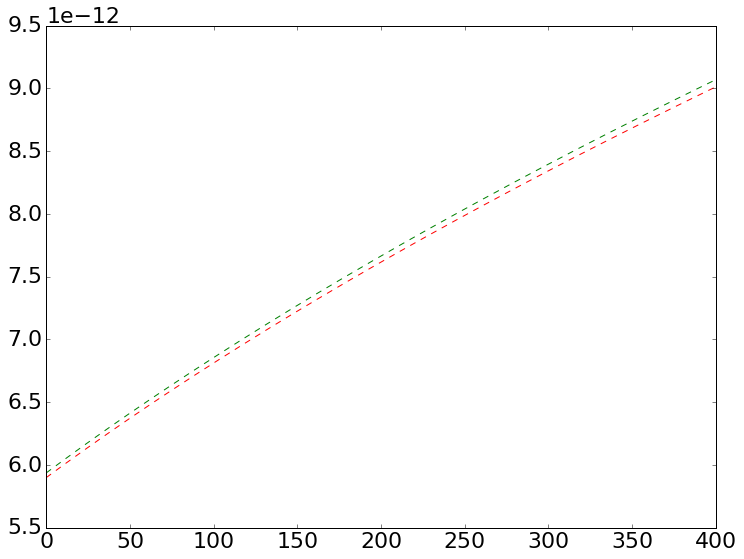

In [4]:
from scipy import constants as sc
sc.Boltzmann
import scipy
scipy.constants.unit('Boltzmann constant')

import numpy as np
k= sc.Boltzmann

def f_to_k(f):
    return (f + 459.67)*5./9.

T = np.arange(300.0, 700.)

def vel(temp, m):
    import math
    k= sc.Boltzmann
    return math.sqrt(2*k*temp/m)


v_235 = np.arange(0.0, 400.0)
v_238 = np.arange(0.0, 400.0)
ratio = np.arange(0.0, 400.0)

m_235 = 235
m_238 = 238

for i in range(0, 400): 
    v_235[i] = vel(T[i], m_235)
    v_238[i] = vel(T[i], m_238)
    ratio[i] = v_235[i]/v_238[i]
    
plt.plot(v_235, 'g--')
plt.plot(v_238, 'r--')

In [5]:
f_to_k(700.)

644.2611111111112

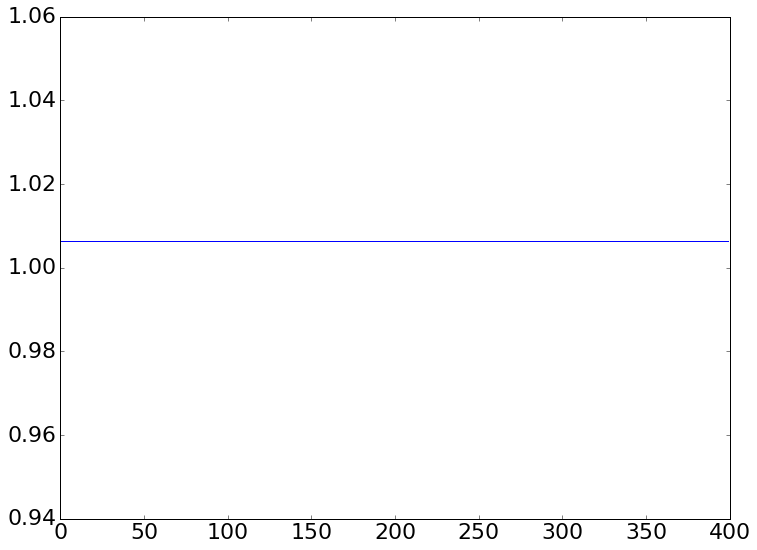

In [6]:
plt.plot(ratio)

$^{238}UF_6$ and $^{235}UF_6$ have different effusive rates. This is used to separate them through a porous barrier. 

$$\frac{V_L}{V_H} = \sqrt{\frac{M_H}{M_L}} = \alpha$$

In the case of $^{238}UF_6$ and $^{235}UF_6$:

$$M_H = M_{^{238}U} + 6\times M_F$$
$$\Rightarrow M_H = 238 + 6\times 19$$

$$M_L = M_{^{235}U} + 6\times M_F$$
$$\Rightarrow M_H = 235 + 6\times 19$$

So, $\alpha$ is the separative capacity of a single gaseous diffusion stage. 


### Math of Enrichment

\begin{align}
F &= \mbox{rate of feed material (per time)}\\
P &= \mbox{rate of enriched product material (per time)}\\
W &= \mbox{rate of waste material (tails)}\\
x_f &= \mbox{weight percent of the target isotope in feed }\\
x_p &= \mbox{weight percent of the target isotope in product}\\
x_w &= \mbox{weight percent of the target isotope remains in waste}\\
\end{align}

The core equations in the math of enrichment are these two:

\begin{align}
F &= P + W\\
x_fF &= x_pP + x_wW\\
\end{align}

We try to make these more useful by defining the following derived equations. 

\begin{align}
FF &= \frac{F}{P}\\
   &= \frac{x_p - x_w}{x_f - x_w}\\
WF &= \frac{W}{P}\\
   &= \frac{x_p - x_f}{x_f - x_w}
\end{align}


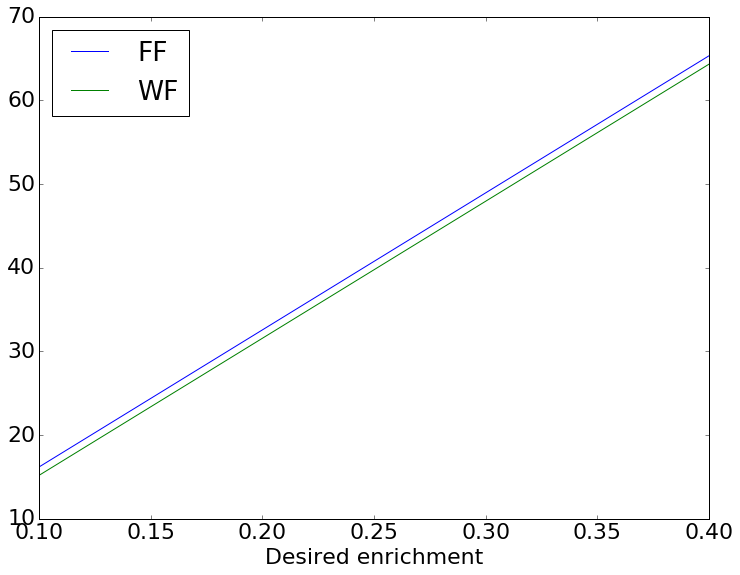

In [7]:
def feed(P, W):
    return P + W

def prod(F, W):
    return F - W

def tail(P, F):
    return F - P

def ff(x_p, x_w, x_f):
    num = x_p - x_w
    denom = x_f - x_w
    return num/denom

def wf(x_p, x_w, x_f):
    num = x_p - x_f
    denom = x_f - x_w
    return num/denom

def x_p(f, p, x_f, x_w):
    return (f/p)*(x_f - x_w) + x_w

def x_w(f, p, x_f, x_p):
    num = x_p - (f/p)*x_f
    denom = 1-(f/p)
    return num/denom

x_p = np.arange(0.1, 0.5, 0.1)
to_plot = np.arange(1.,5.)
for i in range(0,4):
    to_plot[i] = ff(x_p[i], 0.001, 0.00711)

plt.plot(x_p, to_plot, label="FF")
plt.plot(x_p, to_plot - 1, label="WF")
plt.xlabel("Desired enrichment")
plt.legend(loc=2)

### Separation Potentials

\begin{align}
V(x_i) &= (2x_i -1)ln\left(\frac{x_i}{1-x_i}\right)\\
\Rightarrow V(x_f) &= (2x_f -1)ln\left(\frac{x_f}{1-x_f}\right)\\
\end{align}

/Users/khuff/anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


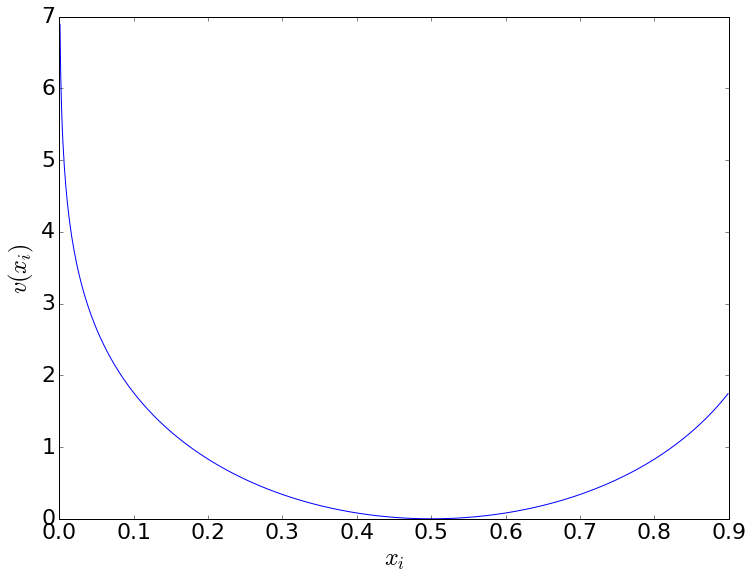

In [8]:
from math import log
def v(x):
    """separation potential"""
    return (2*x - 1) * log(x/(1-x))

x_i = np.arange(0.001, 0.9, 0.001)
to_plot = [v(x) for x in x_i]
plt.plot(x_i, to_plot)
plt.xlabel(r'$x_i$', fontsize=24)
plt.ylabel(r'$v(x_i)$', fontsize=24)

$$SWU = \tau(PV(x_p) + WV(x_w) - FV(x_f)))$$

/Users/khuff/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:18: RuntimeWarning: divide by zero encountered in double_scalars
/Users/khuff/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in double_scalars
/Users/khuff/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in double_scalars


/Users/khuff/anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


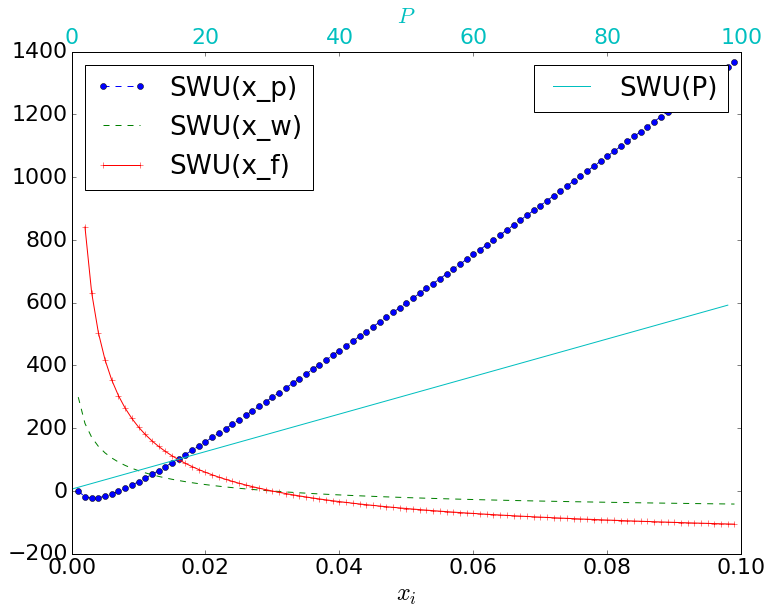

In [11]:
def swu(x_p, x_w, x_f, p, t):
    w = p*wf(x_p, x_w, x_f)
    f = p*ff(x_p, x_w, x_f)
    return t*(p*v(x_p) + w*v(x_w) - f*v(x_f))


x_i = np.arange(0.001, 0.1, 0.001)

v_x_p = 0.03
v_x_w = 0.001
v_x_f = 0.00711
prod = 50
t = 1
swu_p = [swu(v_x_p, v_x_w, v_x_f, x, 1) for x in range(1, 100)]
swu_x_p = [swu(x, v_x_w, v_x_f, prod, 1) for x in x_i]
swu_x_w = [swu(v_x_p, x, v_x_f, prod, 1) for x in x_i]
swu_x_f = [swu(v_x_p, v_x_w, x, prod, 1) for x in x_i]


fig, ax1 = plt.subplots()

ax1.plot(x_i, swu_x_p, label= "SWU(x_p)", marker='o', linestyle='dashed')
ax1.plot(x_i, swu_x_w, label= "SWU(x_w)", linestyle='dashed')
ax1.plot(x_i, swu_x_f, label= "SWU(x_f)", marker='+', linestyle='solid')
ax1.set_xlabel(r'$x_i$', color='k', fontsize=24)

ax1.legend(loc=2)


ax2 = ax1.twiny()
ax2.plot(swu_p, label="SWU(P)", color='c')
ax2.set_xlabel(r'$P$', color='c')
for tl in ax2.get_xticklabels():
    tl.set_color('c')

ax2.legend()




### SWU Factor

The SWU factor is the number of SWUs required per unit product (in our case, kg of enriched U).

\begin{align}
SF &= \frac{SWU}{P\tau}\\
   &= V(x_p) + \frac{W}{P}V(x_w) - \frac{F}{P}V(x_f)
\end{align}

/Users/khuff/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:18: RuntimeWarning: divide by zero encountered in double_scalars
/Users/khuff/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in double_scalars
/Users/khuff/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


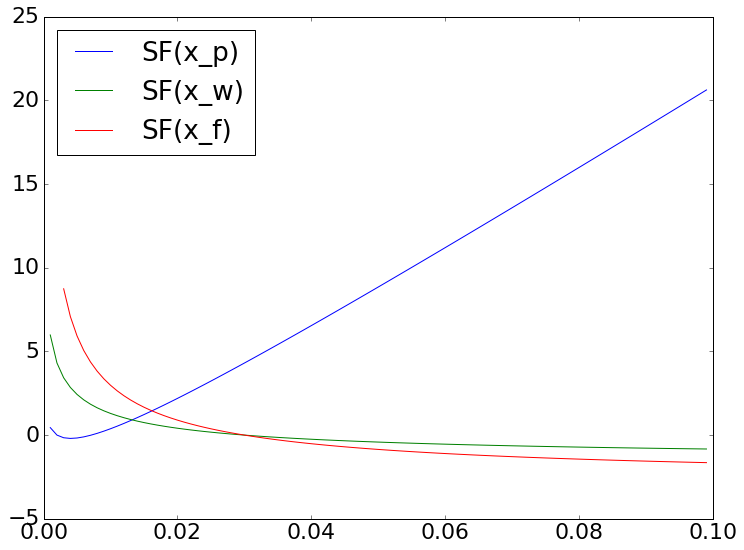

In [23]:
plt.clf()
def swu_factor(x_p, x_w, x_f):
    sf = v(x_p) + wf(x_p, x_w, x_f)*v(x_w) - ff(x_p, x_w, x_f)*v(x_f)
    return sf


x_i = np.arange(0.001, 0.1, 0.001)
x_p = 0.03
x_w = 0.002
x_f = 0.00711

sf_x_p = [swu_factor(x,   x_w, x_f) for x in x_i]
sf_x_w = [swu_factor(x_p, x,   x_f) for x in x_i]
sf_x_f = [swu_factor(x_p, x_w, x) for x in x_i]

plt.plot(x_i, sf_x_p, label= "SF(x_p)")
plt.plot(x_i, sf_x_w, label= "SF(x_w)")
plt.plot(x_i, sf_x_f, label= "SF(x_f)")
plt.legend(loc=2)

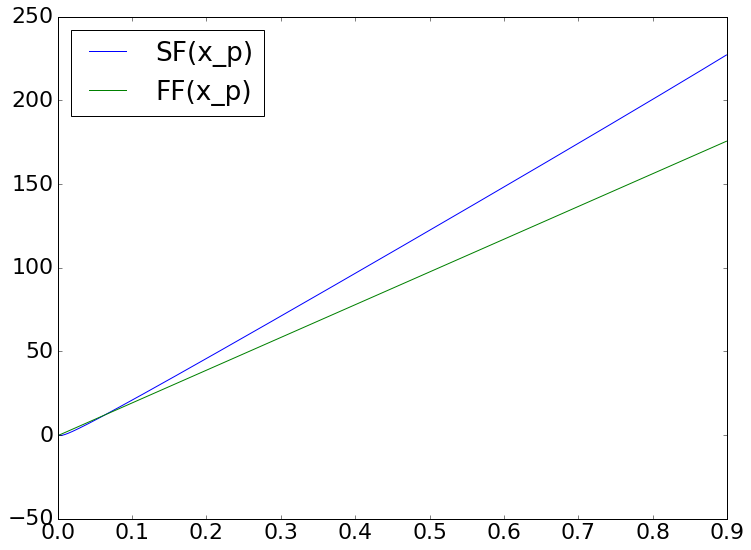

In [24]:
plt.clf()
def swu_factor(x_p, x_w, x_f):
    sf = v(x_p) + wf(x_p, x_w, x_f)*v(x_w) - ff(x_p, x_w, x_f)*v(x_f)
    return sf


x_i = np.arange(0.001, 0.9, 0.001)
x_p = 0.03
x_w = 0.002
x_f = 0.00711

sf_x_p = [swu_factor(x, x_w, x_f) for x in x_i]
ff_x_p = [ff(x, x_w, x_f) for x in x_i]

plt.plot(x_i, sf_x_p, label= "SF(x_p)")
plt.plot(x_i, ff_x_p, label= "FF(x_p)")
plt.legend(loc=2)

## Centrifugal Enrichment


### Centrifugal Force

Centrifugal enrichment relies on the __centrifugal force__. The centrifugal force is only apparent in the rotating reference frame. In the inertial reference frame, it is not apparent, so it is a 'fictitious' force. Fictitious or not, though, in the stationary reference frame, things move.

#### Velocity
Velocity in a rotating frame of reference, with the absolute angular velocity, $\omega$, gives

$$\frac{\operatorname{d}\boldsymbol{r}}{\operatorname{d}t} = \left[\frac{\operatorname{d}\boldsymbol{r}}{\operatorname{d}t}\right] + \boldsymbol{\omega} \times \boldsymbol{r}$$

Note that the square brackets in this notation indicate that the argumet is evaluated in So, the velocity in the rotating reference frame is dependent on the rotation, $\omega$. 

#### Acceleration

Acceleration in a rotating reference frame simply undergoes the same derivative transformation a second time.

$$\begin{align}
\boldsymbol{a} &=\frac{\operatorname{d}^2\boldsymbol{r}}{\operatorname{d}t^2} = \frac{\operatorname{d}}{\operatorname{d}t}\frac{\operatorname{d}\boldsymbol{r}}{\operatorname{d}t} = \frac{\operatorname{d}}{\operatorname{d}t} \left( \left[\frac{\operatorname{d}\boldsymbol{r}}{\operatorname{d}t}\right] + \boldsymbol{\omega} \times \boldsymbol{r}\ \right) \\
 &= \left[ \frac{\operatorname{d}^2 \boldsymbol{r}}{\operatorname{d}t^2} \right] + \frac{\operatorname{d} \boldsymbol{\omega}}{\operatorname{d}t}\times\boldsymbol{r} + 2 \boldsymbol{\omega}\times \left[ \frac{\operatorname{d} \boldsymbol{r}}{\operatorname{d}t} \right] + \boldsymbol{\omega}\times ( \boldsymbol{\omega} \times \boldsymbol{r}) \ .
\end{align}
$$

But, that's all in the rotating frame. When an observer views this, the forces must appear to cancel. So, we arrive at the observed form of the equation of motion, where :

$$\boldsymbol{F} - m\frac{\operatorname{d} \boldsymbol{\omega}}{\operatorname{d}t}\times\boldsymbol{r} - 2m \boldsymbol{\omega}\times \left[ \frac{\operatorname{d} \boldsymbol{r}}{\operatorname{d}t} \right] - m\boldsymbol{\omega}\times (\boldsymbol{\omega}\times \boldsymbol{r}) = m\left[ \frac{\operatorname{d}^2 \boldsymbol{r}}{\operatorname{d}t^2} \right]$$


#### Questions:

- What direction is represented by the vector $\boldsymbol{r}$?
- What direction is represented by the vector $\boldsymbol{\omega}$?
- Combining these facts with the equation above, what can be said about the direction of the velocity vector $\vec{\omega}\times\vec{r}$?
- What about the direction of the final term of the observed force $-\vec{\omega}\times(\vec{\omega}\times\vec{r})$?







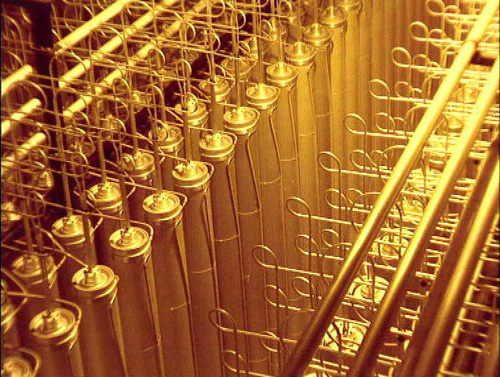

In [14]:
# Let's see a classic image of a bank of centrifuges
from IPython.display import Image
Image("http://world-nuclear.org/uploadedImages/org/info/Nuclear_Fuel_Cycle/Enrichment_and_Conversion/centrfge.jpg")

### Separation Factor per Centrifuge Stage

$$\alpha = 1+ \frac{M_H - M_L}{2RT}\omega^2a^2$$

In the case of $^{238}UF_6$ and $^{235}UF_6$:

$$M_H = M_{^{238}U} + 6\times M_F$$
$$\Rightarrow M_H = 238 + 6\times 19$$
$$\Rightarrow M_H = 

$$M_L = M_{^{235}U} + 6\times M_F$$
$$\Rightarrow M_H = 235 + 6\times 19$$


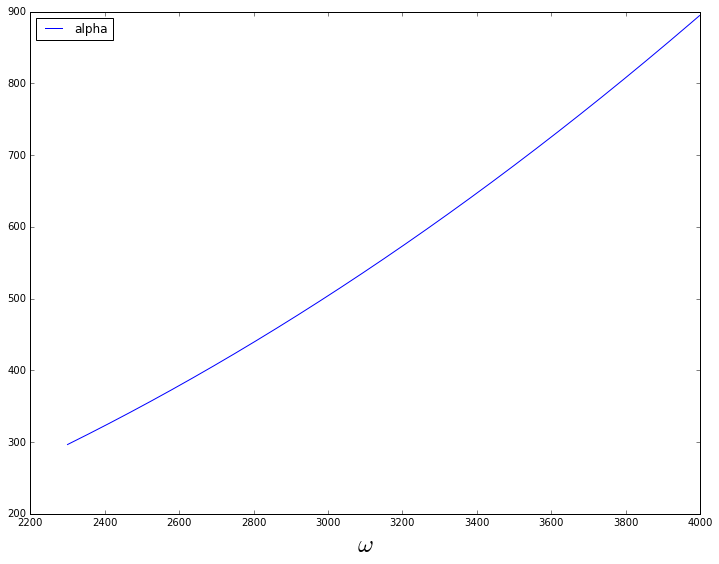

In [15]:
from scipy import constants as sc
import math
def alpha(m_h, m_l, omega, a, t):
    """
    :param omega: angular speed of rotating bowls (rad/s)
    :param a: inside radius of rotor [m]
    :param m_h: molecular weight of \[^{238}U^{19}F_6\]
    :param m_l: molecular weight of \[^{235}U^{19}F_6\]
    :param r: R, molar gas constant
    :param t: temperature in Kelvin
    """
    return 1 + ((m_h-m_l)*(omega**2)*(a**2))/(2*sc.R*t)

def sep_cap(l, m_h, m_l, omega, a, t):
    """
    :param l: length of the bowl [m]
    :param omega: angular speed of rotating bowls (rad/s)
    :param a: inside radius of rotor [m?]
    :param m_h: molecular weight of \[^{238}U^{19}F_6\]
    :param m_l: molecular weight of \[^{235}U^{19}F_6\]
    :param r: R, molar gas constant
    :param t: temperature in Kelvin
    """
    return math.exp((l*(m_h-m_l)**2*(omega*a)**4))/(t**2)


m_h = (238 + 6*19)
m_l = (235 + 6*19)
a = 0.3048
t = 300
#l = 4
omega = np.arange(2300., 4000.)

alpha_plot = [alpha(m_h, m_l, o, a, t) for o in omega]
#plt.plot(alpha_plot, label=r'$\alpha$ (separation factor)')

#sep_cap_plot = [sep_cap(l, m_h, m_l, o, a, t) for o in omega]

plt.plot(omega, alpha_plot, label="alpha")
#plt.plot(sep_cap_plot, label="sep cap")
plt.xlabel(r'$\omega$', fontsize=24)
plt.legend(loc=2)

## The Zippe Centrifuge


![https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/Zippe-type_gas_centrifuge.svg/2000px-Zippe-type_gas_centrifuge.svg.png](https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/Zippe-type_gas_centrifuge.svg/2000px-Zippe-type_gas_centrifuge.svg.png)


> A Zippe-type centrifuge has a hollow, cylindrical rotor filled with gaseous uranium in the form of its hexafluoride. A pulsating magnetic field at the bottom of the rotor, similar to that used in an electric motor, is able to spin it quickly enough that the U-238 is thrown towards the edge. The lighter U-235 collects near the center. The bottom of the gaseous mix is heated, producing convection currents that move the U-238 down. The U-235 moves up, where scoops collect it. Each centrifuge has one inlet and two output lines (corresponding to the heavy and the light fractions).

> At the high speed of rotation, the gas is compressed close to the wall of the rotor. The rotor can be almost a meter in length (diameter is likely to be less than 10 cm) and a temperature gradient of 300 °C between the top and bottom of the rotor produces a very strong convection current. In addition, the very strong coriolis forces produced add to the separation efficiency.

> To reduce friction, the rotor spins in a vacuum. A magnetic bearing holds the top of the rotor steady, and the only physical contact is the needle-like bearing that the rotor sits on. The three gas lines must be concentric with the fixed axis as the outer rim is spinning very quickly, and the seal is very important.

## History

### Calutron Electromagnetic Separation

1940s schematic of Calutron separation physics.
![https://upload.wikimedia.org/wikipedia/commons/d/d8/Diagram_of_uranium_isotope_separation_in_the_calutron.png](https://upload.wikimedia.org/wikipedia/commons/d/d8/Diagram_of_uranium_isotope_separation_in_the_calutron.png)

Electromagnetic separation cartoon.
![https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Electromagnetic_separation.svg/777px-Electromagnetic_separation.svg.png](https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Electromagnetic_separation.svg/777px-Electromagnetic_separation.svg.png)

Alpha I racetrack, Y-12 Uranium 235 electromagnetic separation plant, Manhattan Project, Clinton Engineer Works, Oak Ridge
![Alpha I racetrack, Y-12 Uranium 235 electromagnetic separation plant, Manhattan Project, Clinton Engineer Works, Oak Ridge](https://upload.wikimedia.org/wikipedia/commons/thumb/9/99/Y-12_Calutron_Alpha_racetrack.jpg/1024px-Y-12_Calutron_Alpha_racetrack.jpg)


Y-12, Oak Ridge.
![Y-12](https://upload.wikimedia.org/wikipedia/commons/thumb/d/da/HD.4A.145_%2810406006195%29.jpg/971px-HD.4A.145_%2810406006195%29.jpg)

Calutron operators.
![Calultron Operators](https://upload.wikimedia.org/wikipedia/commons/thumb/6/62/Calutron_operators.jpg/1024px-Calutron_operators.jpg)


## Separation Nozzle Method

The nozzle method is another type of enrichment technology that relies on mass. 

![http://www.ngdir.ir/Data_SD/GeoLab/Pics/GeoLabPic_4055_2.jpg](http://www.ngdir.ir/Data_SD/GeoLab/Pics/GeoLabPic_4055_2.jpg)

In particular, lighter elements are deflected upward more easily and are separated physically from their heavier counterparts. 




## Laser Enrichment

Recall the hyperfine structure of the atom.

![https://upload.wikimedia.org/wikipedia/commons/1/17/Fine_hyperfine_levels.svg](https://upload.wikimedia.org/wikipedia/commons/1/17/Fine_hyperfine_levels.svg)

![./neri_hyperfine_2002.png](./neri_hyperfine_2002.png)

### AVLIS
Atomic vapor laser isotope separation. 

![http://images.slideplayer.com/15/4665636/slides/slide_6.jpg](http://images.slideplayer.com/15/4665636/slides/slide_6.jpg)

![http://2.bp.blogspot.com/-aK3CJyQkAFY/UYv-sa0bjfI/AAAAAAAAAHE/qGXq2MOLzNU/s1600/Lawrencefacility.gif](http://2.bp.blogspot.com/-aK3CJyQkAFY/UYv-sa0bjfI/AAAAAAAAAHE/qGXq2MOLzNU/s1600/Lawrencefacility.gif)

![http://3.bp.blogspot.com/-BY7RWNjFJ50/UYwH-M6NiAI/AAAAAAAAAIM/q5aOCpJfxTc/s640/AVLIS.gif](http://3.bp.blogspot.com/-BY7RWNjFJ50/UYwH-M6NiAI/AAAAAAAAAIM/q5aOCpJfxTc/s640/AVLIS.gif)
![https://upload.wikimedia.org/wikipedia/commons/thumb/2/23/AVLIS_laser.jpg/640px-AVLIS_laser.jpg](https://upload.wikimedia.org/wikipedia/commons/thumb/2/23/AVLIS_laser.jpg/640px-AVLIS_laser.jpg)


### SILEX
In Australia, a combination of the two methods, abbreviated to SILEX (separation of isotopes via laser excitation). Cold gas, pulsed $CO_2$ laser with an amplified $16 \mu m$ wavelength laser which preferentially excites the $^{235}UF_6$. 


![https://universe-review.ca/I14-03-Ulaser2.jpg](https://universe-review.ca/I14-03-Ulaser2.jpg)

## Economics of Enrichment

The enrichment technologies used by industry must be energy effecient and economically feasible. Cost of enrichment is typically given in $\$/SWU$, so to find the cost of enrichment, one must multiply the price of separation with the number of SWUs to be purchased. 

$$\$ = \frac{\$}{SWU}SWU$$

### Discussion: If a $\$/kg$ unit is needed, one must multiply the price of separation in $\$/SWU$ with what value?


## World Enrichment Capacity

![./world_enrichment_cap.png](./world_enrichment_cap.png)

## Aside: Enrichment of Heavy Water
$^2H$ is also known as D (deuterium).

### Discussion: Are $D$ (deuterium) and $H$ (protium) easier or harder to separate than isotopes of U?


### Why?